In [12]:
from pathlib import Path

import anndata
import scanpy as sc
import pandas as pd
import seaborn as sns

import pollock
from pollock.models.model import PollockDataset, PollockModel, load_from_directory

specify which module to use for cell type predictions

In [13]:
module_filepath = 'modules/pbmc'

download adata object here

it is also the same anndata object create here

In [14]:
adata = sc.read_h5ad('data/pbmc.h5ad')
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

create a new anndata object where raw counts are stored in .X

In [15]:
prediction_adata = anndata.AnnData(X=adata.layers['raw_counts'],
                                  obs=adata.obs,
                                  var=adata.var)

create PollockDataset and load in module

In [16]:
loaded_pds, loaded_pm = load_from_directory(prediction_adata, module_filepath)

2020-06-09 10:57:35,518 normalizing counts for prediction
2020-06-09 10:57:35,519 filtering for genes in training set
2020-06-09 10:57:35,520 0 genes in training set are missing from prediction set
/Users/erikstorrs/miniconda3/envs/pollock/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:339: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
2020-06-09 10:57:35,546 scaling data


predict cell types

returns cell type labels, probability for the given cell type labels, and the probabilities of all cell types

In [17]:
labels, probs, cell_type_probs = loaded_pm.predict_pollock_dataset(loaded_pds, labels=True, )

df = pd.DataFrame.from_dict({
    'predicted_cell_type': labels,
    'cell_type_probability': probs,
})
df.index = prediction_adata.obs.index
df = pd.concat((df, pd.DataFrame(data=cell_type_probs, index=prediction_adata.obs.index,
                            columns=[f'probability_{c}' for c in loaded_pds.cell_types])), axis=1)
df

,predicted_cell_type,cell_type_probability,probability_B,probability_CD14 Monocytes,probability_CD4 T,probability_CD8 T,probability_Dendritic,probability_FCGR3A Monocytes,probability_Megakaryocytes,probability_NK
AAACATACAACCAC-1,CD4 T,0.90,0.01,0.00,0.90,0.09,0.00,0.00,0.00,0.00
AAACATTGAGCTAC-1,B,0.77,0.77,0.03,0.02,0.04,0.08,0.04,0.02,0.00
AAACATTGATCAGC-1,CD4 T,0.73,0.06,0.01,0.73,0.13,0.02,0.02,0.01,0.02
AAACCGTGCTTCCG-1,CD14 Monocytes,0.53,0.00,0.53,0.00,0.00,0.02,0.45,0.00,0.00
AAACCGTGTATGCG-1,CD8 T,0.58,0.00,0.00,0.01,0.58,0.01,0.04,0.00,0.36
...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,CD14 Monocytes,0.60,0.00,0.60,0.00,0.00,0.38,0.02,0.00,0.00
TTTCTACTGAGGCA-1,B,0.91,0.91,0.00,0.04,0.00,0.02,0.02,0.01,0.00
TTTCTACTTCCTCG-1,B,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TTTGCATGAGAGGC-1,B,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [18]:
adata.obs = pd.merge(adata.obs, df, left_index=True, right_index=True)
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,predicted_cell_type,cell_type_probability,probability_B,probability_CD14 Monocytes,probability_CD4 T,probability_CD8 T,probability_Dendritic,probability_FCGR3A Monocytes,probability_Megakaryocytes,probability_NK
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776,CD4 T,CD4 T,0.90,0.01,0.00,0.90,0.09,0.00,0.00,0.00,0.00
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596,B,B,0.77,0.77,0.03,0.02,0.04,0.08,0.04,0.02,0.00
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736,CD4 T,CD4 T,0.73,0.06,0.01,0.73,0.13,0.02,0.02,0.01,0.02
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085,CD14 Monocytes,CD14 Monocytes,0.53,0.00,0.53,0.00,0.00,0.02,0.45,0.00,0.00
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490,NK,CD8 T,0.58,0.00,0.00,0.01,0.58,0.01,0.04,0.00,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436,CD14 Monocytes,CD14 Monocytes,0.60,0.00,0.60,0.00,0.00,0.38,0.02,0.00,0.00
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422,B,B,0.91,0.91,0.00,0.04,0.00,0.02,0.02,0.01,0.00
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150,B,B,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795,B,B,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [19]:
adata.obs['annotated_cell_type'] = adata.obs['leiden'].to_list()

... storing 'predicted_cell_type' as categorical
... storing 'annotated_cell_type' as categorical


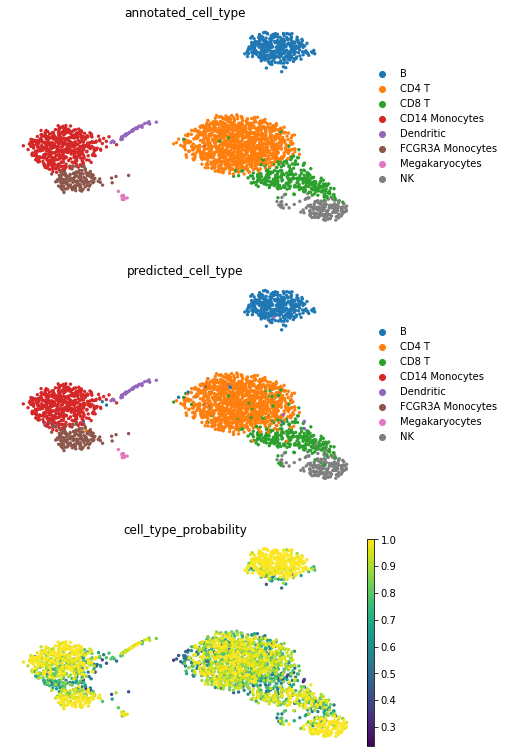

In [20]:
sc.pl.umap(adata, color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability'],
          frameon=False, ncols=1)

## visualization of cell embeddings

with pollock we can also visualize the latent space created by the BVAE

here we take the emb

In [22]:
cell_embeddings = loaded_pm.get_cell_embeddings(loaded_pds.prediction_ds)
cell_embeddings.shape, cell_embeddings

((2638, 25),
 array([[ 1.5719168 , -1.0541413 ,  0.80419743, ...,  0.02662637,
          1.5764142 , -1.5272593 ],
        [ 3.5423357 , -2.3685796 ,  2.0198534 , ...,  1.2868664 ,
          3.0271435 , -2.1153674 ],
        [ 2.295609  , -1.579912  ,  0.9702776 , ...,  0.1239034 ,
          2.0381923 , -1.711554  ],
        ...,
        [ 1.624307  , -1.0742161 ,  1.0710963 , ...,  0.7368445 ,
          1.4000973 , -0.6427827 ],
        [ 1.4325517 , -0.8817073 ,  0.8512326 , ...,  0.7798302 ,
          1.2287565 , -0.60153306],
        [ 1.129058  , -0.8512681 ,  0.47699487, ...,  0.20231944,
          1.0429041 , -1.0244323 ]], dtype=float32))

In [23]:
adata.obsm['cell_embeddings'] = cell_embeddings

replace pca generated nearest neighbor and umap with cell embedding generated one

In [24]:
sc.pp.neighbors(adata, use_rep='cell_embeddings')
sc.tl.umap(adata)

/Users/erikstorrs/miniconda3/envs/pollock/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


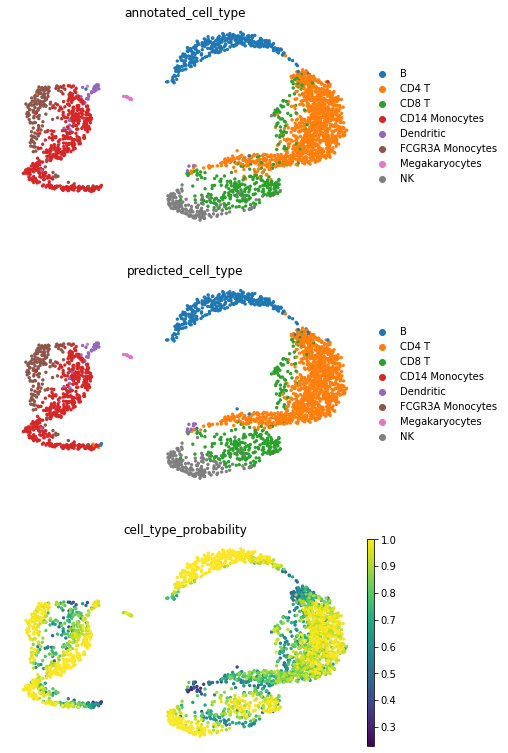

In [25]:
sc.pl.umap(adata, color=['annotated_cell_type', 'predicted_cell_type', 'cell_type_probability'],
          frameon=False, ncols=1)